In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
import math

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
# train.describe().T

## Part 1 Data Cleaning

### Clean Traning Data

In [7]:
num = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
null_data = pd.concat([num,percent],keys=['null_num','percentage'],axis=1)


In [8]:
null_data.head(40)

,null_num,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [9]:
train = train.drop(null_data[null_data['null_num']>1].index, axis=1)


In [10]:
# train.isnull().sum()

In [11]:
# Dealing with missing data

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train.isnull().sum().max()

0

### Clean Test Data

In [12]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [13]:
num1 = test.isnull().sum().sort_values(ascending=False)
percent1 =  (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_null = pd.concat([num1,percent1],keys=['null_num','percentage'],axis=1)

In [14]:
test_null 

,null_num,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
...,...,...
Electrical,0,0.000000
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000


In [15]:
test.drop((test_null[test_null['null_num']>4]).index,1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [16]:
num1 = test.isnull().sum().sort_values(ascending=False)
percent1 =  (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_null = pd.concat([num1,percent1],keys=['null_num','percentage'],axis=1)

In [17]:
test_null.head(20)

,null_num,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [18]:
null_features = test_null[test_null['null_num']>0].index

In [19]:
null_features

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageQual', 'GarageFinish', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'KitchenQual', 'TotalBsmtSF', 'Exterior2nd', 'GarageCars',
       'Exterior1st', 'GarageArea', 'SaleType'],
      dtype='object')

In [20]:
for f in null_features:
    test[f]=test[f].fillna(test[f].mode()[0])

## Part 2 Plotting

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  OverallCond    1460 non-null   int64 
 15  YearBuilt      1460 non-null   int64 
 16  YearRemodAdd   1460 non-null   int64 
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [22]:
# 

In [23]:
train.shape

(1460, 58)

In [24]:
train.iloc[1].T

Id                     2
MSSubClass            20
LotArea             9600
Street              Pave
LotShape             Reg
LandContour          Lvl
LotConfig            FR2
LandSlope            Gtl
Neighborhood     Veenker
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            6
OverallCond            8
YearBuilt           1976
YearRemodAdd        1976
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      MetalSd
Exterior2nd      MetalSd
ExterQual             TA
ExterCond             TA
Foundation        CBlock
BsmtFinSF1           978
BsmtFinSF2             0
BsmtUnfSF            284
TotalBsmtSF         1262
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
1stFlrSF            1262
2ndFlrSF               0
LowQualFinSF           0
GrLivArea           1262
FullBath               2
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1


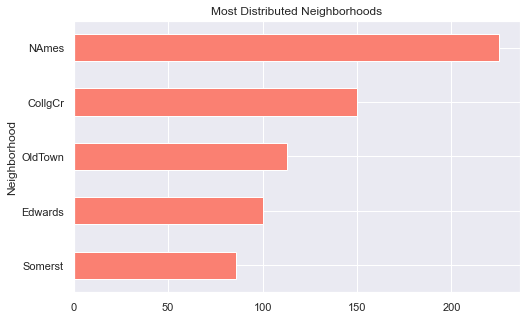

In [25]:
x = train.groupby('Neighborhood').count().sort_values(by='Id', ascending=True)['Id'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Most Distributed Neighborhoods",color='salmon')

# ax = sns.barplot(data=train.groupby('Neighborhood').count().sort_values(by='Id', ascending=True)['Id'])
# ax = sns.barplot(x="tip", y="day", data=tips)
plt.show()

In [26]:
# x = train['sal'.groupby('Neighborhood').mean.sort_values(by='Id', ascending=True)['Id'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Top 5 Neighborhoods",color='salmon')


# plt.show()

<AxesSubplot:title={'center':'Average House Price/Neighborhood'}, ylabel='Neighborhood'>

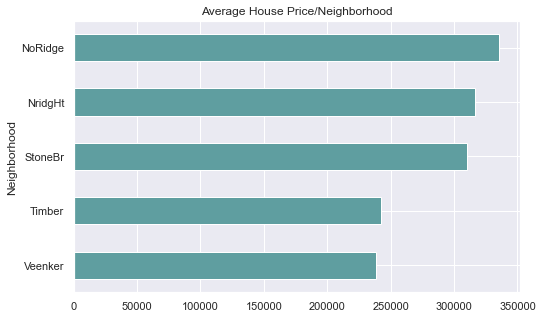

In [27]:
train.groupby(['Neighborhood']).mean().sort_values(by='SalePrice', ascending=True)['SalePrice'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Average House Price/Neighborhood",color='cadetblue')

* Most distributed: North Ames / College Creek / Old Town / Edwards / Somerset
* Most expensive: 

<AxesSubplot:>

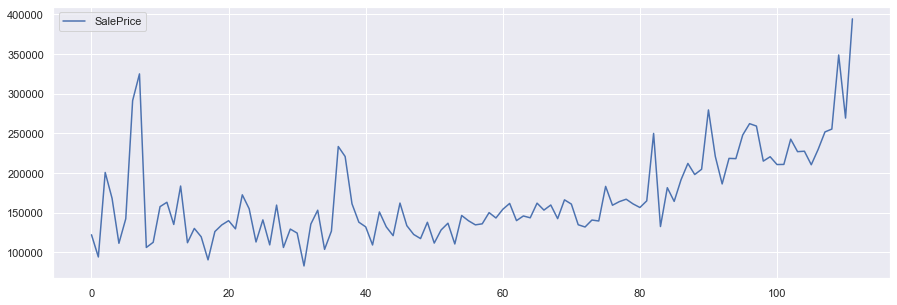

In [28]:
yearly_price = train.groupby('YearBuilt', as_index = False)['SalePrice'].mean().sort_values(by = 'YearBuilt')

# plt.plot(yearly_price['YearBuilt'],yearly_price['SalePrice'],figsize = (19,5))
# yearly_price

yearly_price[['SalePrice']].plot(kind='line',figsize = (15,5))

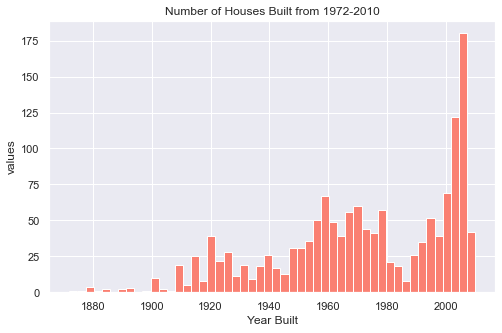

In [29]:
plt.figure(figsize=(8,5))
plt.hist(train['YearBuilt'],bins=50,color='salmon')

plt.title('Number of Houses Built from 1972-2010')
plt.xlabel('Year Built')
plt.ylabel('values')
plt.show() 
# figsize=(8,8

In [30]:
train['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [31]:
# time_df = train['year']
quality=train[['YearBuilt','OverallQual']].sort_values(by='YearBuilt')
quality

,YearBuilt,OverallQual
1349,1872,8
1137,1875,5
747,1880,7
304,1880,7
1132,1880,6
...,...,...
898,2009,9
515,2009,10
157,2009,8
762,2009,7


In [32]:
quality1 = train[['YearBuilt','OverallCond']].sort_values(by='YearBuilt')

* We can take a look here and figure out why they don't have similar trends

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>

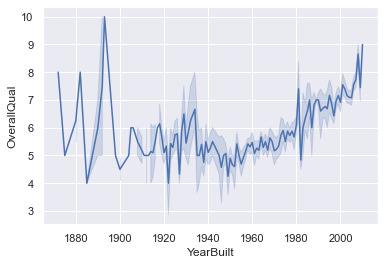

In [33]:
sns.lineplot(x=quality['YearBuilt'],y=quality['OverallQual'])

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallCond'>

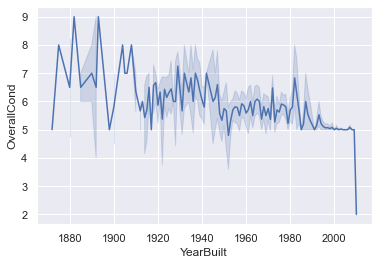

In [34]:
sns.lineplot(x=quality1['YearBuilt'],y=quality1['OverallCond'])

In [35]:
# quality1[quality1['OverallCond']<5]

In [36]:
quality.sort_values(by='OverallQual',ascending=False)

,YearBuilt,OverallQual
691,1994,10
185,1892,10
591,2008,10
1442,2008,10
58,2006,10
...,...,...
1100,1920,2
636,1936,2
916,1949,2
375,1922,1


## Part 3 Feature engineering

### (1) Features Selection

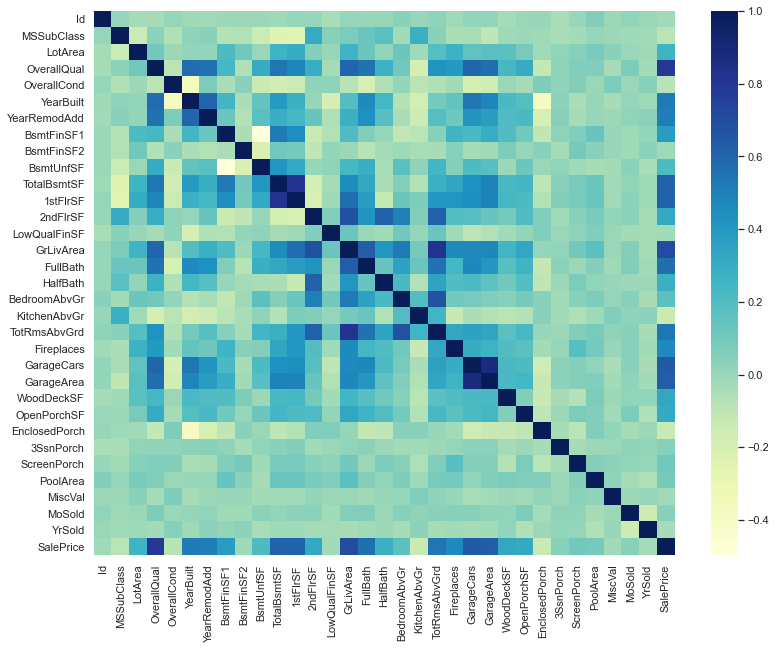

In [37]:
# sns.color_palette("Spectral", as_cmap=True)
corrMatrix = train.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corrMatrix, annot=False,cmap="YlGnBu")
plt.show()
# Wistia
# YlGnBu

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

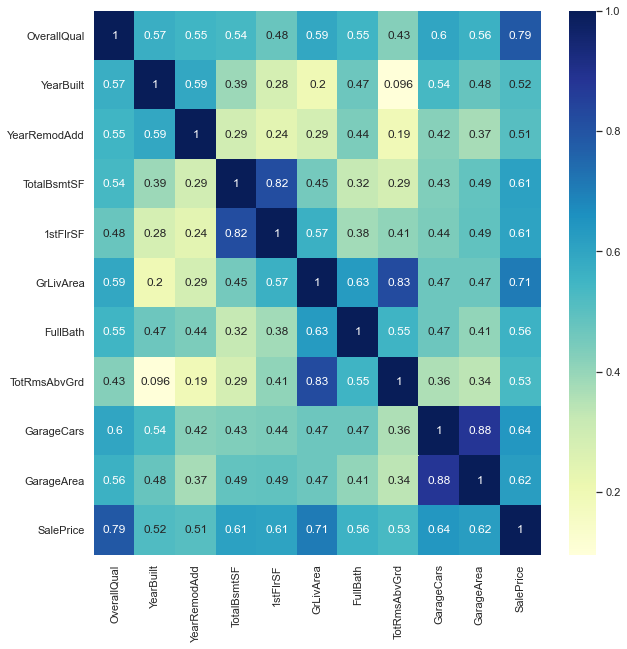

In [38]:
corrmat = train.corr()
top_features = corrmat.index[abs(corrmat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_features].corr(),annot = True,cmap="YlGnBu");
top_features

# selected_features = 

- 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
- Better to use RMSE and R^2       

In [39]:
train[top_features]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [40]:
# boxplot = train[top_features].boxplot()
# boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

In [41]:
# sns.color_palette("pastel")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Right Skewed Sale Prices')

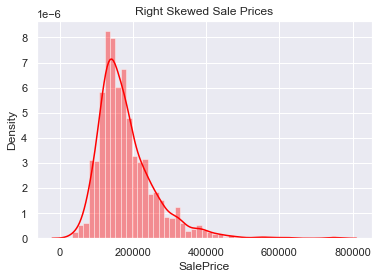

In [42]:
sns.distplot(train['SalePrice'],color='red').set_title('Right Skewed Sale Prices')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After Log Transformation')

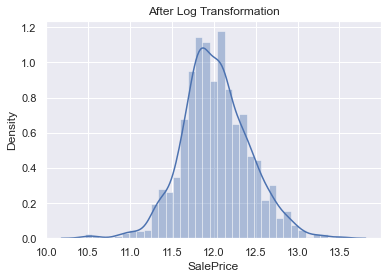

In [43]:
# plt.hist(np.log(train['SalePrice']))
# plt.title('LOG TRANSFORM OF SALE PRICES')
sns.distplot(np.log(train['SalePrice'])).set_title('After Log Transformation')

### (2)Log Transform

In [44]:
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

In [45]:
train_cat.shape,train_num.shape

((1460, 25), (1460, 33))

In [46]:
skewness = train_num.apply(lambda x:skew(x)).sort_values(ascending=False)
skewness

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64

In [47]:
big_skew=skewness[abs(skewness)>0.5]

In [48]:
train_num[big_skew.index]=

SyntaxError: invalid syntax (<ipython-input-48-eb27eca618fd>, line 1)